In [1161]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import semopy
from semopy import Model
from semopy import calc_stats
from semopy import gather_statistics
from semopy import ModelEffects
from semopy import ModelMeans
from semopy import semplot
from semopy import Optimizer
from semopy.inspector import inspect
from semopy import inspector

import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser, Rotator)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [1162]:
df_raw = pd.read_excel("Electric Taxis in South Africa(1-5000).xlsx")
df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))
df = df_raw.copy()

# Data Cleaning
df.dropna(subset=['Please select the option that applies to you:'], inplace=True)

df.drop(df.columns[0:7], axis = 1, inplace = True)
df = df[df['Please select the option that applies to you:'] != 'User of taxi service for transport']
driver_owner_user = df['Please select the option that applies to you:']

df['What is your gender?'] = np.where(df['What is your gender?'] == 'Transgender male', 'Male',df['What is your gender?'] )

df['What is your gender?'] = np.where(df['What is your gender?'] == 'Transgender female', 'Female',df['What is your gender?'] )


###### DROP RESPONDENTS WHO DID NOT SAY IF DRIVER OWNER OR USER ######

#### DEMOGRAPHICS ####
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]

#### EDUCATION ####
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]

#### DRIVER ####
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver_e_taxi_better_than_ICE = df[driver_questions[10]]

#### OWNER ####
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]

#### OWNER/DRIVER ####
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]

#### USER ####
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
user_e_taxi_benefit = user_questions[7]
user_e_taxi_risks = user_questions[8]
user_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]


#### PERCEPTIONS OF ICE TAXI ####
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]

#### PERCEPTIONS OF EV TAXI ####
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]

#### NEED FOR E-TAXI ####
need_for_etaxi = df.columns[81:83]
how_many_years_until_etaxi_available = df[need_for_etaxi[0]]
how_many_years_no_more_ICE_taxi = df[need_for_etaxi[1]]

#### CLIMATE CHANGE ####
climate_serious  = df['Climate change is a serious issue']
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]

#### PERSONAL CHARACTERISTICS ####
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

driver_perceptions = driver_questions[8:11]
print(driver_perceptions)
owner_perceptions = owner_questions[-6:]
print(owner_perceptions)
owner_driver_perceptions = owner_driver_questions[-7:]
print(owner_driver_perceptions)



Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)',
       'What risks would an electric taxi inroduce to your operations compared to petrol/diesel taxis? (select all that apply)',
       'Driving an electric taxi would be better for you than driving a petrol/diesel taxi'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)2',
       'What risks would an electric taxi inroduce to your operations compared to a petrol/diesel taxi? (select all that apply)',
       'Having an electric taxi would benefit your business.',
       'Which one would cost more to run the taxi per day?',
       'Which one would cost more to buy?',
       'Which one would have more service costs?'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)3',
       'What risks would

# Descriptive Data

### Demographic profiles for Table 1

In [1249]:
demographics_df = df[df['You would buy an electric taxi when available.'] != 'I am not interested in buying any type of taxi']
len(demographics_df)

4452

In [1255]:
demographics_df_dou = demographics_df['Please select the option that applies to you:']

Drive a taxi           0.894
Own a taxi             0.078
Drive and own a taxi   0.028
Name: Please select the option that applies to you:, dtype: float64

In [1253]:
demographics_df = df[df['You would buy an electric taxi when available.'] != 'I am not interested in buying any type of taxi']
pd.set_option('display.float_format', lambda x: '%.3f' % x)
for variable in demographics:
    print(variable)
    print(demographics_df[variable].value_counts())
    print(demographics_df[variable].value_counts(normalize=True))
    
for variable in education:
    print(variable)
    print(demographics_df[variable].value_counts())
    print(demographics_df[variable].value_counts(normalize=True))
    
print(driver_owner_user.value_counts(), driver_owner_user.value_counts(normalize=True))

In which province or country do you live?
Western Cape     4376
Eastern Cape       16
North West         16
Gauteng            12
Swaziland           8
KwaZulu-Natal       7
Northern Cape       5
Lesotho             4
Limpopo             3
Free State          3
Mpumalanga          2
Name: In which province or country do you live?, dtype: int64
Western Cape    0.983
Eastern Cape    0.004
North West      0.004
Gauteng         0.003
Swaziland       0.002
KwaZulu-Natal   0.002
Northern Cape   0.001
Lesotho         0.001
Limpopo         0.001
Free State      0.001
Mpumalanga      0.000
Name: In which province or country do you live?, dtype: float64
Do you live in a city/urban or rural environment?
Rural           2360
City / Urban    2092
Name: Do you live in a city/urban or rural environment?, dtype: int64
Rural          0.530
City / Urban   0.470
Name: Do you live in a city/urban or rural environment?, dtype: float64
In which area are you living in now?
Khayelitsha                   406
D

### EV Purchase Intent 

In [1256]:
demographics_df_dou = demographics_df['Please select the option that applies to you:']

In [1257]:
# Total
# print(df[perceptions_of_EV_taxi[2]].value_counts().to_latex(), df[perceptions_of_EV_taxi[2]].value_counts(normalize=True).to_latex())

# By Group 
pd.crosstab(demographics_df[perceptions_of_EV_taxi[2]], demographics_df_dou, margins=True)

Please select the option that applies to you:,Drive a taxi,Drive and own a taxi,Own a taxi,All
You would buy an electric taxi when available.,,,,
Agree,1189,49,133,1371
Disagree,1223,10,10,1243
Neutral,423,48,180,651
Strongly agree,288,12,20,320
Strongly disagree,855,6,6,867
All,3978,125,349,4452


In [1265]:
print((100 * round(pd.crosstab(demographics_df[perceptions_of_EV_taxi[2]], demographics_df_dou, margins=True, normalize='columns').reindex(['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']),3)).to_latex())

\begin{tabular}{lrrrr}
\toprule
Please select the option that applies to you: &  Drive a taxi &  Drive and own a taxi &  Own a taxi &    All \\
You would buy an electric taxi when available. &               &                       &             &        \\
\midrule
Strongly disagree                              &        21.500 &                 4.800 &       1.700 & 19.500 \\
Disagree                                       &        30.700 &                 8.000 &       2.900 & 27.900 \\
Neutral                                        &        10.600 &                38.400 &      51.600 & 14.600 \\
Agree                                          &        29.900 &                39.200 &      38.100 & 30.800 \\
Strongly agree                                 &         7.200 &                 9.600 &       5.700 &  7.200 \\
\bottomrule
\end{tabular}



# Structural Equation Modeling (SEM)

Map the measured variables in the theoretical model from string to numeric for input into model

In [ ]:
benefits = df[driver_perceptions[0]].str.split(';')
benefits[1]

In [ ]:

# BENEFITS
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver_benefits = df.explode('driver_benefits_of_etaxi_exploded', driver_questions[-4])
exploded_df_driver_benefits = exploded_df_driver_benefits[(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].notnull())]

# RISKS
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver_risks = df.explode('driver_risks_of_etaxi_exploded', driver_questions[-4])
exploded_df_driver_risks = exploded_df_driver_risks[(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].notnull())]

perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]

benefits_correct_answers = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster speeds with']

exploded_df_driver_benefits['Correct_benefits'] = np.where(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].isin(benefits_correct_answers), 1, 0)
pd.crosstab(exploded_df_driver_benefits['Correct_benefits'], exploded_df_driver_benefits[driver_questions[-4]], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Normalised Count', title = 'Driver stated knowledge of electric taxi vs understanding of benefits' )
plt.show()


risks_correct_answers = ['Longer periods of charging an electric taxi than filling with diesel/petrol', 'Shorter distances between']
exploded_df_driver_risks['Correct_risks'] = np.where(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].isin(risks_correct_answers), 1, 0)
pd.crosstab(exploded_df_driver_risks['Correct_risks'], exploded_df_driver_risks[driver_questions[-4]], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Normalised Count', title = 'Driver stated knowledge of electric taxi vs understanding of risks' )
plt.show()
# check if any answered 'don't know' to benefits AND risks



# test if the means between the two groups is significantly different for understanding of benefits and risks and knowledge of e-taxi
exploded_df_driver_benefits.groupby(driver_questions[-4])['Correct_benefits'].mean()
# t-test
t_test = ttest_ind(exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'Yes']['Correct_benefits'], exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'No']['Correct_benefits'])
t_test
t_test = ttest_ind(exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'Yes']['Correct_risks'], exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'No']['Correct_risks'])
t_test

print(pd.crosstab( exploded_df_driver_benefits[driver_questions[-4]], exploded_df_driver_benefits['Correct_benefits'],normalize = 'index').to_latex())
print(pd.crosstab(exploded_df_driver_risks[driver_questions[-4]], exploded_df_driver_risks['Correct_risks'], normalize = 'index').to_latex())

In [1306]:
graph_string = 'digraph { a -> b; }'
dot = graphviz.Source(graph_string, filename='test.gv', format='png', engine='dot', directory='/usr/local/Cellar/graphviz/8.0.2/bin/') 
dot.render()



ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [1301]:
import graphviz


def run_SME(df, mod):
    # Standardize the structural model data
    scaler = StandardScaler()
    df_std = scaler.fit_transform(df)
    df_std = pd.DataFrame(df_std, columns = df.columns)
        
    model = Model(mod)
    model.load_dataset(df_std)
    model.load_cov(df_std.cov())
    m=model.fit(df_std, solver = 'SLSQP', obj = 'MLW')

   # opt = Optimizer(model)
   # objective_function_value = opt.optimize()
    ins = inspect(model, std_est = True)
    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(ins)
        
    #print('chi2/dof', calc_stats(model)['chi2'] / calc_stats(model)['DoF'])
    return ins, model
# Define model
mod = f'''

    # Define the factors and their indicators
    
    POC =~ POC_1 + POC_2 + POC_3 
    PBC =~ PBC_1 + PBC_2 
    EC =~ EC_1 + EC_2 + EC_3
    RP =~ RP_1 + RP_2 + RP_3
    PIC =~ PIC_1 + PIC_2 + PIC_3 
    PIR =~ PIR_1 + PIR_2
    PAM =~ PAM_1 + PAM_2
    
    # Covariance
    
    # Higher order factors
    PU =~ PBC + POC
    PN =~ RP + EC
    
    # Target var
    INT =~ intention

    # Regressions 
    INT ~ PU + PBC + POC + PN + PIC + PIR + PAM + age + gender + location + region + education + driver + owner 
    '''
params, model = run_SME(sm_df, mod)
semplot(model, 'mod.png')


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
###### Create mappings ####### 
negative_index = {'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}
positive_index = {'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1}
###### Knowledge of EV #########


###################### Vehicle and System Attributes ############################

# Perceived EV range 
df['range'] = EV_taxi_range.map({'Less than 50km': 25, '50 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '301 - 350km': 325, '351 - 400km': 375, '401 - 450km': 425, '451 - 500km': 475, 'More than 500km': 525})

# Perceived EV charging time 
df['charge_time'] = EV_taxi_charge_time.map({'Less than 10minutes': 5, '10 - 20minutes': 15, '20 - 30minutes': 25, '30minutes - 1hour': 45, '1 - 2hours': 90, '2 - 5hours': 210, 'More than 5hours': 300})

# df['range'] = EV_taxi_range.map({'Less than 50km': 25, '50 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '301 - 350km': 325, '351 - 400km': 375, '401 - 450km': 425, '451 - 500km': 475, 'More than 500km': 525})

# # Perceived EV charging time 
# df['charge_time'] = EV_taxi_charge_time.map({'Less than 10minutes': 5, '10 - 20minutes': 15, '20 - 30minutes': 25, '30minutes - 1hour': 45, '1 - 2hours': 90, '2 - 5hours': 210, 'More than 5hours': 300})


# # #standardize range and charge time so they're on the same scale for the structural model 
# df['PVS_1'] =  (df['range'] - df['range'].mean())/df['range'].std()
# df['PVS_2'] =  (df['charge_time'] - df['charge_time'].mean())/df['charge_time'].std()

# df['PVS_1'] = np.where((df['range'] >= 125) & (df['range'] <= 250), 1, 0)
# df['PVS_2'] = np.where(df['charge_time'] >= 120, 0,1)
# df['PVS_1'] =  (df['range'] - df['range'].mean())/df['range'].std()
# df['PVS_2'] =  (df['charge_time'] - df['charge_time'].mean())/df['charge_time'].std()

# df['PVS_1'] = df['range']
# df['PVS_2'] = df['charge_time']

# Define latent construct
pvs = ['PVS_1', 'PVS_2']#, 'PVS_3', 'PEU_4']


###################### Perceived Usefulness (PU) (+) ############################

# Having EV taxi would be better
driver_questions[-1]
owner_questions[-4]
owner_driver_questions[-5]
# 7. E-taxi charging expensive
df['POC_1'] = EV_taxi_charging_expensive.map(negative_index)
# 8. E-taxi purchase expensive
df['POC_2'] = EV_taxi_purchase_expensive.map(negative_index)
# 9. E-taxi service expensive
df['POC_3'] = EV_taxi_service_expensive.map(negative_index)

# df['driver_prefers_EV'] = df[driver_questions[-1]].map({'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}).fillna(0)
# df['owner_prefers_EV'] = df[owner_questions[-4]].map({'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}).fillna(0)
# df['owner_driver_prefers_EV'] = df[owner_driver_questions[-5]].map({'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}).fillna(0)
# df['POC_4'] = df['driver_prefers_EV']  + df['owner_prefers_EV'] + df['owner_driver_prefers_EV']


pu = ['POC_1',
    'POC_2',
    'POC_3']

################ Perceived Behavioral Control (PBC) #####################


# 5. Worried about stations
df['PBC_1'] = EV_taxi_worried_about_stations.map(negative_index)
# 6. Affected by loadshedding 
df['PBC_2'] = EV_taxi_affected_by_loadshedding.map(negative_index)


# Perceived Behavioral Control
pbc = ['PBC_1',
   'PBC_2']


######################### Personal Norms #########################


# The taxi industry should reduce its environmental impact
df['EC_1'] =  df[climate_change[1]].map(positive_index)

# Electric taxis are better for the environment
df['EC_2'] =  df[climate_change[3]].map(positive_index)

# Climate change is a serious issue
df['EC_3']= climate_serious.map(positive_index) 

# Gov't should switch to electric taxis
#df['EC_4'] =  df[climate_change[4]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})


pn = ['EC_1',  'EC_2', 'EC_3']#, 'PNU_4']



#####################  Risk tolerance #####################

# Takes risks 
df['RP_1'] = personal_risk_taker.map(positive_index)

# Trusts technology 
df['RP_2'] = peronsal_trust_people.map(positive_index)

# Trusts people 
df['RP_3'] = personal_trust_tech.map(positive_index)

rt = ['RP_1', 'RP_2', 'RP_3']

#####################  Perception of Alternative Technology Costs #####################

# # Perceived ICE safety
# df['POA_1'] = ICE_taxi_safe.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})

# # Perceived ICE reliability
# df['POA_2'] = ICE_taxi_reliable.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})

# ICE charging expensive
df['PIC_1'] = ICE_taxi_fuel_expensive.map(negative_index)
# ICE purchase expensive
df['PIC_2'] = ICE_taxi_purchase_expensive.map(negative_index)
# ICE service expensive
df['PIC_3'] = ICE_taxi_service_expensive.map(negative_index)

pac = ['PIC_1', 'PIC_2' ,'PIC_3'] #['POA_1', 'POA_2', 'POA_3', 'POA_4'], 'POAU_5']


#####################  Perception of Alternative Technology Reliability #####################
# Perceived ICE safety
df['PIR_1'] = ICE_taxi_safe.map(positive_index)

# Perceived ICE reliability
df['PIR_2'] = ICE_taxi_reliable.map(positive_index)

par = ['PIR_1', 'PIR_2']

###################### Perception of Market Trends ############################

# Years until EV available 
df['PAM_1'] = how_many_years_until_etaxi_available.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':14})

# Years until ICE unavailable
df['PAM_2'] = how_many_years_no_more_ICE_taxi.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':14})

# df['PAM_1'] = 1/df['PAM_1']  

# # Years until ICE unavailable
# df['PAM_2'] = 1/df['PAM_2'] 

pom = ['PAM_1',
    'PAM_2'] 





##################### Occupation #####################

df['driver'] = np.where(driver_owner_user == 'Drive a taxi', 1, 0)
#df['owner_driver'] = np.where(driver_owner_user == 'Drive and own a taxi', 1, 0)
df['owner']= np.where(driver_owner_user == 'Own a taxi', 1, 0)
#df['owner'] = np.where(driver_owner_user == 'Drive and own a taxi', 1, df['owner'])


#### Outcome variable
df['intention'] = EV_taxi_purchase_decision.map(positive_index)


# Behavioral Intention 
target_var = ['intention']

# Get socio demographics
df['age'] = df[demographics[4]].map({'18 - 24': 21, '25 - 34': 30, '35 - 44': 40, '45 - 54': 50, '55 - 65': 60, '65+': 70})
df['gender'] = df['What is your gender?'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else np.nan))
df['education'] = np.where(highest_lvl_schooling == 'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)', 1, 0)
df['location'] = np.where(city_or_rural == 'City / Urban', 1,0)
df['region'] = np.where(df['In which province or country do you live?'] == 'Western Cape', 1, 0)


socio_demographics = ['age', 'gender', 'education', 'location', 'region', 'driver', 'owner', 'range', 'charge_time']

####### All Measured Variables #######

variables = pu + rt + pbc + pn + pac + par + pom + target_var 

# Initialize dataframe for factor analysis by taking the columns of df where the variables are stored
sm_df = df[variables + socio_demographics].dropna()

# add socio demographics to sm_df


# Initialize dataframe for factor analysis by taking the columns of sm_df that are not 'target_var'
cfa_df = sm_df.drop(target_var + socio_demographics, axis=1)
print(len(sm_df), len(cfa_df))



# Define model
mod = f'''

    # Define the factors and their indicators
    
    POC =~ POC_1 + POC_2 + POC_3 
    PBC =~ PBC_1 + PBC_2 
    EC =~ EC_1 + EC_2 + EC_3
    RP =~ RP_1 + RP_2 + RP_3
    PIC =~ PIC_1 + PIC_2 + PIC_3 
    PIR =~ PIR_1 + PIR_2
    PAM =~ PAM_1 + PAM_2
    
    # Covariance
    
    # Higher order factors
    PU =~ PBC + POC
    PN =~ RP + EC
    
    # Target var
    INT =~ intention

    # Regressions 
    INT ~ PU + PBC + POC + PN + PIC + PIR + PAM + age + gender + location + region + education + driver + owner 
    '''
pd.set_option('display.float_format', lambda x: '%.2f' % x)
params, stats = run_SME(sm_df, mod)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(params[['rval', 'lval', 'Est. Std', 'p-value']])
calc_stats(stats)

4452 4452


         rval       lval  Est. Std p-value
0          PU        PBC      0.83       -
1          PU        POC      0.85    0.00
2          PN         RP      0.79       -
3          PN         EC      0.87    0.00
4          PU        INT      0.12    0.00
5         PBC        INT     -0.02    0.45
6         POC        INT      0.11    0.00
7          PN        INT      0.44    0.00
8         PIC        INT     -0.06    0.03
9         PIR        INT     -0.49    0.00
10        PAM        INT     -0.05    0.00
11        age        INT     -0.13    0.00
12     gender        INT      0.01    0.69
13   location        INT      0.18    0.00
14     region        INT      0.02    0.23
15  education        INT     -0.10    0.00
16     driver        INT     -0.11    0.00
17      owner        INT     -0.01    0.67
18        POC      POC_1      0.74       -
19        POC      POC_2      0.87    0.00
20        POC      POC_3      0.78    0.00
21        PBC      PBC_1      0.76       -
22        P

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,285,332,4308.23,0.00,41524.52,0.90,0.90,0.88,0.90,0.89,0.06,130.06,552.54,0.97


In [1295]:
###### Create mappings ####### 
negative_index = {'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}
positive_index = {'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1}
###### Knowledge of EV #########


###################### Vehicle and System Attributes ############################

# Perceived EV range 
df['range'] = EV_taxi_range.map({'Less than 50km': 25, '50 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '301 - 350km': 325, '351 - 400km': 375, '401 - 450km': 425, '451 - 500km': 475, 'More than 500km': 525})

# Perceived EV charging time 
df['charge_time'] = EV_taxi_charge_time.map({'Less than 10minutes': 5, '10 - 20minutes': 15, '20 - 30minutes': 25, '30minutes - 1hour': 45, '1 - 2hours': 90, '2 - 5hours': 210, 'More than 5hours': 300})

# df['range'] = EV_taxi_range.map({'Less than 50km': 25, '50 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '301 - 350km': 325, '351 - 400km': 375, '401 - 450km': 425, '451 - 500km': 475, 'More than 500km': 525})

# # Perceived EV charging time 
# df['charge_time'] = EV_taxi_charge_time.map({'Less than 10minutes': 5, '10 - 20minutes': 15, '20 - 30minutes': 25, '30minutes - 1hour': 45, '1 - 2hours': 90, '2 - 5hours': 210, 'More than 5hours': 300})


# # #standardize range and charge time so they're on the same scale for the structural model 
# df['PVS_1'] =  (df['range'] - df['range'].mean())/df['range'].std()
# df['PVS_2'] =  (df['charge_time'] - df['charge_time'].mean())/df['charge_time'].std()

# df['PVS_1'] = np.where((df['range'] >= 125) & (df['range'] <= 250), 1, 0)
# df['PVS_2'] = np.where(df['charge_time'] >= 120, 0,1)
# df['PVS_1'] =  (df['range'] - df['range'].mean())/df['range'].std()
# df['PVS_2'] =  (df['charge_time'] - df['charge_time'].mean())/df['charge_time'].std()

# df['PVS_1'] = df['range']
# df['PVS_2'] = df['charge_time']

# Define latent construct
pvs = ['PVS_1', 'PVS_2']#, 'PVS_3', 'PEU_4']


###################### Perceived Usefulness (PU) (+) ############################

# Having EV taxi would be better
driver_questions[-1]
owner_questions[-4]
owner_driver_questions[-5]
# 7. E-taxi charging expensive
df['POC_1'] = EV_taxi_charging_expensive.map(negative_index)
# 8. E-taxi purchase expensive
df['POC_2'] = EV_taxi_purchase_expensive.map(negative_index)
# 9. E-taxi service expensive
df['POC_3'] = EV_taxi_service_expensive.map(negative_index)

# df['driver_prefers_EV'] = df[driver_questions[-1]].map({'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}).fillna(0)
# df['owner_prefers_EV'] = df[owner_questions[-4]].map({'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}).fillna(0)
# df['owner_driver_prefers_EV'] = df[owner_driver_questions[-5]].map({'Strongly agree': 1, 'Agree': 2, 'Neutral': 3, "Don't know": 3, 'Disagree': 4, 'Strongly disagree': 5}).fillna(0)
# df['POC_4'] = df['driver_prefers_EV']  + df['owner_prefers_EV'] + df['owner_driver_prefers_EV']


pu = ['POC_1',
    'POC_2',
    'POC_3']

################ Perceived Behavioral Control (PBC) #####################


# 5. Worried about stations
df['PBC_1'] = EV_taxi_worried_about_stations.map(negative_index)
# 6. Affected by loadshedding 
df['PBC_2'] = EV_taxi_affected_by_loadshedding.map(negative_index)


# Perceived Behavioral Control
pbc = ['PBC_1',
   'PBC_2']


######################### Personal Norms #########################


# The taxi industry should reduce its environmental impact
df['EC_1'] =  df[climate_change[1]].map(positive_index)

# Electric taxis are better for the environment
df['EC_2'] =  df[climate_change[3]].map(positive_index)

# Climate change is a serious issue
df['EC_3']= climate_serious.map(positive_index) 

# Gov't should switch to electric taxis
#df['EC_4'] =  df[climate_change[4]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})


pn = ['EC_1',  'EC_2', 'EC_3']#, 'PNU_4']



#####################  Risk tolerance #####################

# Takes risks 
df['RP_1'] = personal_risk_taker.map(positive_index)

# Trusts technology 
df['RP_2'] = peronsal_trust_people.map(positive_index)

# Trusts people 
df['RP_3'] = personal_trust_tech.map(positive_index)

rt = ['RP_1', 'RP_2', 'RP_3']

#####################  Perception of Alternative Technology Costs #####################

# # Perceived ICE safety
# df['POA_1'] = ICE_taxi_safe.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})

# # Perceived ICE reliability
# df['POA_2'] = ICE_taxi_reliable.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})

# ICE charging expensive
df['PIC_1'] = ICE_taxi_fuel_expensive.map(negative_index)
# ICE purchase expensive
df['PIC_2'] = ICE_taxi_purchase_expensive.map(negative_index)
# ICE service expensive
df['PIC_3'] = ICE_taxi_service_expensive.map(negative_index)

pac = ['PIC_1', 'PIC_2' ,'PIC_3'] #['POA_1', 'POA_2', 'POA_3', 'POA_4'], 'POAU_5']


#####################  Perception of Alternative Technology Reliability #####################
# Perceived ICE safety
df['PIR_1'] = ICE_taxi_safe.map(positive_index)

# Perceived ICE reliability
df['PIR_2'] = ICE_taxi_reliable.map(positive_index)

par = ['PIR_1', 'PIR_2']

###################### Perception of Market Trends ############################

# Years until EV available 
df['PAM_1'] = how_many_years_until_etaxi_available.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':14})

# Years until ICE unavailable
df['PAM_2'] = how_many_years_no_more_ICE_taxi.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':14})

# df['PAM_1'] = 1/df['PAM_1']  

# # Years until ICE unavailable
# df['PAM_2'] = 1/df['PAM_2'] 

pom = ['PAM_1',
    'PAM_2'] 





##################### Occupation #####################

df['driver'] = np.where(driver_owner_user == 'Drive a taxi', 1, 0)
#df['owner_driver'] = np.where(driver_owner_user == 'Drive and own a taxi', 1, 0)
df['owner']= np.where(driver_owner_user == 'Own a taxi', 1, 0)
#df['owner'] = np.where(driver_owner_user == 'Drive and own a taxi', 1, df['owner'])


#### Outcome variable
df['intention'] = EV_taxi_purchase_decision.map(positive_index)


# Behavioral Intention 
target_var = ['intention']

# Get socio demographics
df['age'] = df[demographics[4]].map({'18 - 24': 21, '25 - 34': 30, '35 - 44': 40, '45 - 54': 50, '55 - 65': 60, '65+': 70})
df['gender'] = df['What is your gender?'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else np.nan))
df['education'] = np.where(highest_lvl_schooling == 'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)', 1, 0)
df['location'] = np.where(city_or_rural == 'City / Urban', 1,0)
df['region'] = np.where(df['In which province or country do you live?'] == 'Western Cape', 1, 0)


socio_demographics = ['age', 'gender', 'education', 'location', 'region', 'driver', 'owner', 'range', 'charge_time']

####### All Measured Variables #######

variables = pu + rt + pbc + pn + pac + par + pom + target_var 

# Initialize dataframe for factor analysis by taking the columns of df where the variables are stored
sm_df = df[variables + socio_demographics].dropna()

# add socio demographics to sm_df


# Initialize dataframe for factor analysis by taking the columns of sm_df that are not 'target_var'
cfa_df = sm_df.drop(target_var + socio_demographics, axis=1)
print(len(sm_df), len(cfa_df))



# Define model
mod = f'''

    # Define the factors and their indicators
    
    POC =~ POC_1 + POC_2 + POC_3 
    PBC =~ PBC_1 + PBC_2 
    EC =~ EC_1 + EC_2 + EC_3
    RP =~ RP_1 + RP_2 + RP_3
    PIC =~ PIC_1 + PIC_2 + PIC_3 
    PIR =~ PIR_1 + PIR_2
    PAM =~ PAM_1 + PAM_2
    
    # Covariance
    
    # Higher order factors
    PU =~ PBC + POC
    PN =~ RP + EC
    
    # Target var
    INT =~ intention

    # Regressions 
    INT ~ PU + PBC + POC + PN + PIC + PIR + PAM + age + gender + location + region + education + driver + owner 
    '''
pd.set_option('display.float_format', lambda x: '%.2f' % x)
params, stats = run_SME(sm_df, mod)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(params[['rval', 'lval', 'Est. Std', 'p-value']])
calc_stats(stats)

4452 4452


         rval       lval  Est. Std p-value
0          PU        PBC      0.83       -
1          PU        POC      0.85    0.00
2          PN         RP      0.79       -
3          PN         EC      0.87    0.00
4          PU        INT      0.12    0.00
5         PBC        INT     -0.02    0.45
6         POC        INT      0.11    0.00
7          PN        INT      0.44    0.00
8         PIC        INT     -0.06    0.03
9         PIR        INT     -0.49    0.00
10        PAM        INT     -0.05    0.00
11        age        INT     -0.13    0.00
12     gender        INT      0.01    0.69
13   location        INT      0.18    0.00
14     region        INT      0.02    0.23
15  education        INT     -0.10    0.00
16     driver        INT     -0.11    0.00
17      owner        INT     -0.01    0.67
18        POC      POC_1      0.74       -
19        POC      POC_2      0.87    0.00
20        POC      POC_3      0.78    0.00
21        PBC      PBC_1      0.76       -
22        P

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,285,332,4308.23,0.00,41524.52,0.90,0.90,0.88,0.90,0.89,0.06,130.06,552.54,0.97


In [1298]:
semplot(params, filename = 'model.png')

AttributeError: 'DataFrame' object has no attribute 'inspect'

In [1244]:
sm_df

,PU_1,PU_2,PU_3,RT_1,RT_2,RT_3,PBC_1,PBC_2,PN_1,PN_2,...,intention,age,gender,education,location,region,driver,owner,range,charge_time
0,3,3,3,4,4,4,3,3,4,3,...,4.00,50,1,1,1,1,0,1,325,90
1,3,2,4,3,3,4,2,2,4,4,...,4.00,40,1,1,1,1,0,0,525,45
2,3,3,3,3,3,3,3,3,5,3,...,1.00,40,1,1,1,1,0,1,75,300
3,3,2,1,4,3,4,4,5,3,4,...,4.00,40,1,0,1,1,0,1,425,300
6,3,1,3,4,3,4,5,3,5,5,...,5.00,30,1,0,1,1,1,0,325,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,1,1,4,2,2,1,1,3,3,...,1.00,30,1,1,1,1,1,0,225,210
696,1,1,1,2,2,2,2,1,3,3,...,2.00,30,1,0,1,1,1,0,225,300
697,1,1,1,4,2,2,1,1,3,3,...,2.00,40,1,1,1,1,1,0,225,210
698,1,1,1,2,2,3,1,1,3,3,...,2.00,50,1,0,1,1,1,0,125,210


In [1188]:


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(params)
    #print(inspect(m, std_est = True))

         lval  op       rval  Estimate  Est. Std    Std. Err z-value p-value
0         INT   ~         PU     0.190     0.215       0.033   5.829   0.000
1         INT   ~         RT     0.230     0.251       0.035   6.550   0.000
2         INT   ~        PBC     0.026     0.031       0.033   0.801   0.423
3         INT   ~         PN     0.182     0.247       0.027   6.768   0.000
4         INT   ~        PAC    -0.084    -0.096       0.031  -2.678   0.007
5         INT   ~        POM     0.087     0.133       0.026   3.287   0.001
6         INT   ~        PAR    -0.471    -0.616       0.025 -18.637   0.000
7         INT   ~        age    -0.094    -0.144       0.013  -7.331   0.000
8         INT   ~     gender     0.004     0.006       0.013   0.300   0.764
9         INT   ~   location     0.148     0.227       0.013  11.530   0.000
10        INT   ~     region     0.019     0.030       0.013   1.503   0.133
11        INT   ~  education    -0.100    -0.153       0.013  -7.541   0.000

In [1212]:
corr_df.corr()

,PU_1,PU_2,PU_3,RT_1,RT_2,RT_3,PBC_1,PBC_2,PN_1,PN_2,...,intention,age,gender,education,location,region,driver,owner,range,charge_time
PU_1,1.000,0.638,0.560,-0.111,-0.067,-0.071,0.423,0.472,-0.122,-0.078,...,0.193,-0.093,-0.002,0.016,-0.114,-0.066,-0.136,0.120,-0.106,-0.333
PU_2,0.638,1.000,0.683,-0.087,-0.037,-0.053,0.478,0.512,-0.111,-0.070,...,0.222,-0.099,0.006,-0.018,-0.071,-0.028,-0.145,0.142,-0.068,-0.328
PU_3,0.560,0.683,1.000,-0.076,-0.043,-0.030,0.393,0.435,-0.098,-0.056,...,0.254,-0.067,0.016,-0.027,-0.114,-0.038,-0.138,0.121,-0.030,-0.293
RT_1,-0.111,-0.087,-0.076,1.000,0.431,0.510,-0.017,-0.011,0.414,0.393,...,0.115,-0.000,0.022,0.066,0.101,0.002,0.094,-0.082,0.250,0.106
RT_2,-0.067,-0.037,-0.043,0.431,1.000,0.396,-0.035,-0.036,0.291,0.287,...,0.067,0.084,-0.009,0.097,0.016,0.012,-0.011,-0.002,0.159,0.063
RT_3,-0.071,-0.053,-0.030,0.510,0.396,1.000,-0.042,-0.020,0.450,0.442,...,0.246,-0.055,0.022,0.107,0.130,0.001,0.044,-0.049,0.346,0.055
PBC_1,0.423,0.478,0.393,-0.017,-0.035,-0.042,1.000,0.634,-0.077,-0.050,...,0.183,-0.112,0.023,0.008,-0.081,-0.041,-0.150,0.147,-0.084,-0.252
PBC_2,0.472,0.512,0.435,-0.011,-0.036,-0.020,0.634,1.000,-0.077,-0.053,...,0.217,-0.098,-0.005,0.037,-0.074,-0.037,-0.182,0.187,-0.038,-0.272
PN_1,-0.122,-0.111,-0.098,0.414,0.291,0.450,-0.077,-0.077,1.000,0.708,...,0.188,-0.017,0.008,0.135,0.123,-0.017,0.082,-0.087,0.331,0.165
PN_2,-0.078,-0.070,-0.056,0.393,0.287,0.442,-0.050,-0.053,0.708,1.000,...,0.255,-0.034,0.012,0.145,0.151,-0.004,0.038,-0.047,0.277,0.124


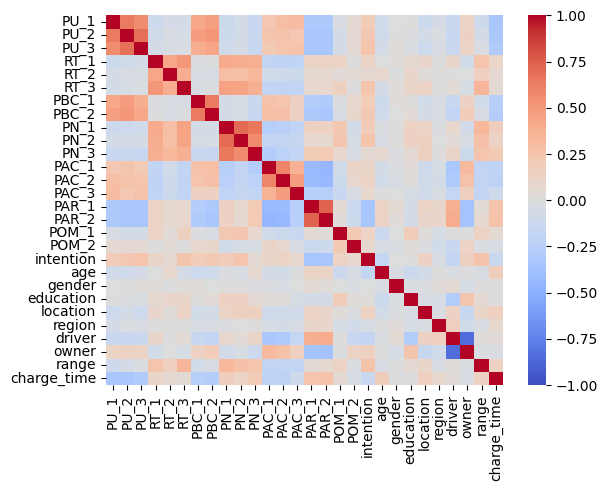

In [1208]:
corr_df = sm_df#.drop(['intention'], axis =1 )
sns.heatmap(corr_df.corr(), cmap = 'coolwarm', vmin = -1, vmax =1, xticklabels=corr_df.columns, yticklabels=corr_df.columns)
plt.savefig('figures/corr_matrix.png')
plt.show()

In [ ]:
# density plot of pom1 and pom2
sns.kdeplot(sm_df['POM_1'], shade=True, color="r")
sns.kdeplot(sm_df['POM_2'], shade=True, color="b")
sns.kdeplot(sm_df['PBC_1'], shade=True, color="g")
sns.kdeplot(sm_df['PBC_2'], shade=True, color="y")
sns.kdeplot(sm_df['PAC_1'], shade=True)


In [ ]:
# Get means
round(cfa_df.mean(),2), cfa_df.median()

### Compute Factor Loadings

In [1090]:

# standardize the data
scaler = StandardScaler()
cfa_columns_std = scaler.fit_transform(cfa_df)
cfa_df_std = pd.DataFrame(cfa_columns_std, columns = cfa_df.columns)

cfa_dict = {
            "PU": pu,
            "RT": rt,
              "PBC": pbc,
              "PN": pn,
              "PAC": pac, 
              "PAR": par,
              "POM": pom
              } 
              
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(cfa_df_std, cfa_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec,  disp=False)

cfa.fit(cfa_df_std.values)

factor_loadings =(pd.DataFrame(cfa.loadings_, columns = cfa_dict.keys(), index = cfa_df.columns))
round(factor_loadings,2)
print(round(factor_loadings.sum(axis = 1),2).to_latex())


\begin{tabular}{lr}
\toprule
{} &     0 \\
\midrule
PU\_1  & 0.890 \\
PU\_2  & 0.950 \\
PU\_3  & 0.910 \\
RT\_1  & 0.910 \\
RT\_2  & 0.860 \\
RT\_3  & 0.900 \\
PBC\_1 & 0.880 \\
PBC\_2 & 0.880 \\
PN\_1  & 0.950 \\
PN\_2  & 0.910 \\
PN\_3  & 0.890 \\
PAC\_1 & 0.900 \\
PAC\_2 & 0.950 \\
PAC\_3 & 0.840 \\
PAR\_1 & 0.910 \\
PAR\_2 & 0.910 \\
POM\_1 & 0.830 \\
POM\_2 & 0.830 \\
\bottomrule
\end{tabular}



/Users/Orie4416/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/confirmatory_factor_analyzer.py:753: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(


### Test Data Quality (KMO and Bartlett's)

In [ ]:

# Kaiser-Meyer-Olkin (KMO) Test determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
kmo_all,kmo_model=calculate_kmo(cfa_df_std)
kmo_model, kmo_all
if kmo_model > 0.6:
    print('Passes KMO Test with value of ', kmo_model)
else:
    print('Fails KMO Test')
    
for idx, value in enumerate(kmo_all):
    if value < 0.6:
        print(cfa_df_std.columns[idx], 'fails KMO Test with value of ', value)

# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

chi_square_value,p_value=calculate_bartlett_sphericity(cfa_df_std)
chi_square_value, p_value
if p_value < 0.05:
    print('Passes Bartlett Sphericity Test with value of ', p_value)
else:
    print('Fails Bartlett Sphericity Test')

### Compute cronbach's alpha

In [1079]:
cfa_df_std

,PU_1,PU_2,PU_3,PBC_1,PBC_2,PN_1,PN_2,PN_3,POM_1,POM_2,PAC_1,PAC_2,PAC_3,PAR_1,PAR_2,RT_1,RT_2,RT_3
0,-1.101,-1.354,-1.145,-1.420,-1.512,0.480,-0.665,-0.745,-0.039,-0.683,-1.578,-1.515,-0.849,2.988,1.725,0.505,0.681,0.439
1,-1.101,-0.081,-2.333,-0.196,-0.265,0.480,0.486,0.453,-1.363,0.105,-0.180,-0.113,-0.849,0.035,4.854,-0.540,-0.239,0.439
2,-1.101,-1.354,-1.145,-1.420,-1.512,1.652,-0.665,-0.745,1.286,0.893,1.217,1.288,1.235,-1.441,-1.404,-0.540,-0.239,-0.567
3,-1.101,-0.081,1.230,-2.643,-4.008,-0.691,0.486,-0.745,-0.701,0.105,1.217,1.288,-0.849,1.512,1.725,0.505,-0.239,0.439
4,-1.101,1.191,-1.145,-3.867,-1.512,1.652,1.636,1.650,-0.701,-2.260,1.217,1.288,1.235,1.512,1.725,0.505,-0.239,0.439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,1.190,1.191,1.230,1.028,0.983,-0.691,-0.665,-0.745,1.286,0.893,-0.180,-0.113,0.193,0.035,0.161,0.505,-1.159,-1.574
4448,1.190,1.191,1.230,-0.196,0.983,-0.691,-0.665,-0.745,1.286,0.893,-0.180,-0.113,0.193,0.035,0.161,-1.585,-1.159,-1.574
4449,1.190,1.191,1.230,1.028,0.983,-0.691,-0.665,-0.745,1.286,0.893,-0.180,-0.113,0.193,0.035,0.161,0.505,-1.159,-1.574
4450,1.190,1.191,1.230,1.028,0.983,-0.691,-0.665,-0.745,1.286,0.893,-0.180,-0.113,0.193,0.035,0.161,-1.585,-1.159,-0.567


In [1091]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    
        # Calculate Cronbach's Alpha for each variable
    alpha_dict = {}
    for col in df_corr.columns:
        alpha_dict[col] = (N * df_corr[col].mean()) / (1 + (N - 1) * df_corr[col].mean())
    
    return cronbach_alpha, alpha_dict
# Calling function to the calculate value of Cronbach's alpha
cba, cba_dict = cronbach_alpha(cfa_df_std)
cba, cba_dict

(0.5231214747203677,
 {'PU_1': 0.7629037346926459,
  'PU_2': 0.7738794900465739,
  'PU_3': 0.7567249609765307,
  'RT_1': 0.7536045975354791,
  'RT_2': 0.7366038657945135,
  'RT_3': 0.7615591104805812,
  'PBC_1': 0.7622878682343586,
  'PBC_2': 0.7698460383680991,
  'PN_1': 0.7650799418629013,
  'PN_2': 0.7764046808639741,
  'PN_3': 0.7316206562015402,
  'PAC_1': 0.5581446407786937,
  'PAC_2': 0.6013202446209197,
  'PAC_3': 0.5601103269436273,
  'PAR_1': -0.44224750135514046,
  'PAR_2': -0.6330935916084938,
  'POM_1': 0.6323683609482708,
  'POM_2': 0.5973139475557123})

Cronbach's alpha for each construct

In [1102]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
    # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    
    # Calculate Cronbach's Alpha for each variable
    alpha_dict = {}
    for col in df_corr.columns:
        alpha_dict[col] = (N * df_corr[col].mean()) / (1 + (N - 1) * df_corr[col].mean())
        
    # Calculate Cronbach's Alpha for each latent variable
    lv_dict = {}
    lv_dict['lv1'] = (2 * df_corr.iloc[0:3]) / (3 +  df_corr.iloc[0:3].sum().sum())
    lv_dict['lv2'] = (3 * df_corr.iloc[3,4]) / (1 + df_corr.iloc[3,4]) 
    lv_dict['lv3'] = (2 * df_corr.iloc[5,6]) / (1 + df_corr.iloc[5,6])
    lv_dict['lv4'] = (5 * df_corr.iloc[7:12,7:12].sum().sum()) / (10 + df_corr.iloc[7:12,7:12].sum().sum())
    
    
    return cronbach_alpha, alpha_dict, lv_dict
cba, cba_dict, lv_dict = cronbach_alpha(cfa_df_std)
cba_dict

{'PU_1': 0.7629037346926459,
 'PU_2': 0.7738794900465739,
 'PU_3': 0.7567249609765307,
 'RT_1': 0.7536045975354791,
 'RT_2': 0.7366038657945135,
 'RT_3': 0.7615591104805812,
 'PBC_1': 0.7622878682343586,
 'PBC_2': 0.7698460383680991,
 'PN_1': 0.7650799418629013,
 'PN_2': 0.7764046808639741,
 'PN_3': 0.7316206562015402,
 'PAC_1': 0.5581446407786937,
 'PAC_2': 0.6013202446209197,
 'PAC_3': 0.5601103269436273,
 'PAR_1': -0.44224750135514046,
 'PAR_2': -0.6330935916084938,
 'POM_1': 0.6323683609482708,
 'POM_2': 0.5973139475557123}

In [1109]:
import pandas as pd
from statistics import variance

df = cfa_df_std
construct_dict = {
    'PU': ['PU_1', 'PU_2', 'PU_3'],
    'RT': ['RT_1', 'RT_2', 'RT_3'],
    'PBC': ['PBC_1', 'PBC_2'],
    'PN': ['PN_1', 'PN_2', 'PN_3'],
    'PAC': ['PAC_1', 'PAC_2', 'PAC_3'],
    'PAR': ['PAR_1', 'PAR_2'],
    'POM': ['POM_1', 'POM_2']
}
alpha_dict = {}
for construct, variables in construct_dict.items():
    construct_scores = cfa_df_std[variables].mean(axis=0)
    n_items = len(variables)
    variance_sum = 0
    for variable in variables:
        variance_sum += variance(cfa_df_std[variable])
    alpha = (n_items / (n_items - 1)) * (1 - (variance_sum / variance(construct_scores)))
    alpha_dict[construct] = alpha

alpha_dict

{'PU': -3.787726260102388e+31,
 'RT': -3.481123495607894e+30,
 'PBC': -1.9756445216393722e+30,
 'PN': -1.469611819231195e+31,
 'PAC': -1.1171562729326571e+31,
 'PAR': -1.0939323336347685e+31,
 'POM': -1.9354350251246392e+30}

### Compute Composite Reliability (CR) and Average Variance Extracted (AVE)

In [1112]:

def compute_ave_cr(factors):
    factors_sq = [i**2 for i in factors]
    factors_errors = [1 - i for i in factors_sq]
    ave = sum(factors_sq)/len(factors_sq)
    cr = sum(factors)**2/(sum(factors)**2 + sum(factors_errors))
    return ave, cr 

# for each column in factor_loadings
# find the rows that contain the string of the column name
# make a list of the values in those rows in that column
# call 'compute_ave_cr()' function on that list
aves = {}
for construct in factor_loadings.columns:
    construct_list = []
    for row in factor_loadings.index:
        if construct in row:
            construct_list.append(factor_loadings.loc[row, construct])
        
    #print(construct, construct_list)
    ave, cr = compute_ave_cr(construct_list)
    aves[construct] = ave
    print(construct, ave, cr)


PU 0.8382965881482415 0.9395461148462446
RT 0.792636757347398 0.9197419313311047
PBC 0.7815564641135009 0.8773861258133723
PN 0.8429113719665828 0.9414610756199117
PAC 0.8092912889245496 0.9270094423892832
PAR 0.8207108922491287 0.9015279594470572
POM 0.6882525118897593 0.8153430447935447


### Compute Heterotrait-Monotrait (HTMT) ratios

In [1126]:
factor_loadings.sum(axis = 1).loc[row]

0.8291432703912384

In [1151]:
def compute_r_i_j(construct_i, construct_j, factor_loadings, df):
    weighted_correlations = []
    for item_i in df.corr().index: # for all the measured variables
        if construct_i in item_i: # then we're looking at a particular item for this construct 
            correlations_item_i = []
            for item_j in df.corr().columns: # for all the measured variables
                if construct_j in item_j: # take a particular item for the other construct
                    correlation_item_i_item_j = df.corr().loc[item_i, item_j]  # correlation between current item i and item j
                    correlations_item_i.append(correlation_item_i_item_j) # add the correlation to the list of correlations for item i
                    
            weighted_correlation_item_i_construct_j = statistics.mean(correlations_item_i) * factor_loadings.sum(axis = 1).loc[item_i] # multiply the mean correlations between item i and the items in construct j by the factor loading of item i to get the weighted correlation between item i and construct j
            
            weighted_correlations.append(weighted_correlation_item_i_construct_j) # add to list of weighted correlations for this construct

    r_i_j = statistics.mean(weighted_correlations) #this is r_i_j for construct i and construct j 
    return r_i_j
construct_correlations = {}
for i in aves:
    for j in aves:
        construct_correlations[i,j] = compute_r_i_j(i, j, factor_loadings, cfa_df_std)
construct_correlations

{('PU', 'PU'): 0.6880012306816332,
 ('PU', 'RT'): -0.058302273683643005,
 ('PU', 'PBC'): 0.4143878463810005,
 ('PU', 'PN'): -0.09833598771234234,
 ('PU', 'PAC'): 0.23087491310647837,
 ('PU', 'PAR'): -0.29805282292559304,
 ('PU', 'POM'): 0.000811115793037905,
 ('RT', 'PU'): -0.05722464431087273,
 ('RT', 'RT'): 0.5613959246435787,
 ('RT', 'PBC'): -0.023738488327662635,
 ('RT', 'PN'): 0.3348854663296459,
 ('RT', 'PAC'): -0.1454831589505691,
 ('RT', 'PAR'): 0.07990192711352971,
 ('RT', 'POM'): 0.05380131005288738,
 ('PBC', 'PU'): 0.3997115780839489,
 ('PBC', 'RT'): -0.023758750389442113,
 ('PBC', 'PBC'): 0.722405955616737,
 ('PBC', 'PN'): -0.08089733079048689,
 ('PBC', 'PAC'): 0.20034597156294742,
 ('PBC', 'PAR'): -0.2669899369194381,
 ('PBC', 'POM'): 0.02647875122695357,
 ('PN', 'PU'): -0.0983498277397188,
 ('PN', 'RT'): 0.3444579859779325,
 ('PN', 'PBC'): -0.08326993135471165,
 ('PN', 'PN'): 0.6996425904737639,
 ('PN', 'PAC'): -0.1924601345504345,
 ('PN', 'PAR'): 0.12686574422891086,
 ('

In [1148]:
for i in aves:
    monotrait = aves[i]
    heterotraits = []
    htmt_list = []
    for j in aves:
        if i != j:
            r_i_j = compute_r_i_j(i, j, factor_loadings, cfa_df_std) 
            
            heterotrait = aves[j] * r_i_j 
            heterotraits.append(heterotrait)
    print(i, [monotrait/heterotrait for heterotrait in heterotraits])
# sqrt(AVEi) / (sqrt(AVE_j) + r_ij)


# for each construct, calculate the average correlation between items that are not part of the same construct, weighted by factor loadings (rij) 
# AVE for each construct

PU [-18.14002990036868, 2.5883936738831244, -10.113542438955939, 4.486586940309884, -3.427001241858999, 1501.6441756913973]
RT [-16.523171390472235, -42.72290636148872, 2.807992833866763, -6.732193961124233, 12.08722918918318, 21.405902961918972]
PBC [2.33246928009521, -41.5013817458924, -11.461573771401682, 4.820309003266082, -3.5667713487305965, 42.885951979946164]
PN [-10.223759173814987, 3.0872474947676416, -12.951895956004881, -5.4117317624888726, 8.095568358160232, 21.283255023076723]
PAC [4.255593316332355, -6.995204588567844, 5.025832017148241, -5.084733220036511, -2.9201039264767514, -42.98014419246888]
PAR [-3.321043396142372, 12.809474705021406, -3.838212220938065, 7.739541407730766, -3.0058010602395973, -32.40298810141265]
POM [965.5328609398463, 17.39018460097558, 35.478207844162675, 15.82532455543253, -32.0814998359472, -24.911367298424626]


Correlation matrix to compare with square of AVE (FOR THE APPENDIX?)

In [ ]:
corr_matrix = cfa_df.corr()
import seaborn as sns
sns.heatmap(corr_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.savefig("figures/corr_matrix.png")
plt.show()
# Find highly correlated variables
high_corr = set() # create an empty set to store highly correlated variable pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

print("Highly correlated variables:", high_corr)


### SEMOPY Structural Equation Model Fitting

In [1045]:
# def run_SME2(df, mod):
# Standardize the structural model data
scaler = StandardScaler()
df_std = scaler.fit_transform(sm_df)
df_std = pd.DataFrame(df_std, columns = sm_df.columns)
    
model = ModelMeans(mod)
model.fit(df_std)
report(model)

NameError: name 'report' is not defined

In [1033]:
semplot(stats, filename = 'model.png')

AttributeError: 'DataFrame' object has no attribute 'inspect'

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(params)
    

In [ ]:
m = ModelMeans(mod)
m.fit(sm_df_std)
m.inspect()

In [ ]:
calc_stats(model).columns

In [ ]:
rsq_att = 1 - model.residuals['ATT'].var() / sm_df_std['ATT'].var()
rsq_int = 1 - model.residuals['INT'].var() / sm_df_std['INT'].var()
print(f"R-squared for ATT: {rsq_att:.2f}")
print(f"R-squared for INT: {rsq_int:.2f}")


In [ ]:
# MAPE (Mean Absolute Percentage Error)
params = inspect(opt).iloc[:,0:4] 
mape = np.mean(semopy.utils.compare_results(model, params))
print("MAPE: {:.2f}%".format(mape * 100))

Other semopy functions to gather more information about the model

# Construct Means

In [1294]:
means = sm_df.mean()
meds = sm_df.median()
stdevs = sm_df.std()
print(pd.DataFrame(list(zip(means, meds, stdevs)), index = sm_df.mean().index, columns = ['Mean', "Median", "Std Devs"]).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &   Mean &  Median &  Std Devs \\
\midrule
POC\_1       &   2.04 &    2.00 &      0.87 \\
POC\_2       &   1.94 &    2.00 &      0.79 \\
POC\_3       &   2.04 &    2.00 &      0.84 \\
RP\_1        &   3.52 &    4.00 &      0.96 \\
RP\_2        &   3.26 &    4.00 &      1.09 \\
RP\_3        &   3.56 &    4.00 &      0.99 \\
PBC\_1       &   1.84 &    2.00 &      0.82 \\
PBC\_2       &   1.79 &    2.00 &      0.80 \\
EC\_1        &   3.59 &    4.00 &      0.85 \\
EC\_2        &   3.58 &    4.00 &      0.87 \\
EC\_3        &   3.62 &    4.00 &      0.84 \\
PIC\_1       &   1.87 &    2.00 &      0.72 \\
PIC\_2       &   1.92 &    2.00 &      0.71 \\
PIC\_3       &   2.19 &    2.00 &      0.96 \\
PIR\_1       &   4.02 &    4.00 &      0.68 \\
PIR\_2       &   4.10 &    4.00 &      0.64 \\
PAM\_1       &   8.18 &    8.00 &      4.53 \\
PAM\_2       &  10.60 &   11.00 &      3.81 \\
intention   &   2.78 &    3.00 &      1.27 \\
age         &  41.29 &   40.00 

In [1284]:
(sm_df['PAM_1']sm_df['PAM_1']).mean()

8.175202156334231

In [1290]:
# Years until EV available 
how_many_years_until_etaxi_available.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':14}).mean(), how_many_years_no_more_ICE_taxi.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':14}).mean()

(8.235418265541059, 10.737528779739064)